In [2]:
import dill
import miner2.miner as miner
import os, sys, datetime
import dill
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
%matplotlib inline


results = '/Users/user/projects/melanoma/results/'
resultsDirectory = '/Users/user/projects/melanoma/results/'
dill.load_session(results + "subtype_discovery.dill")

2019-08-15 16:52:42 	 hello from miner2 version 0.0.9


In [3]:
#load survival Data

survivalSKCM = pd.read_csv("/Users/user/projects/melanoma/melanoma_data/clinical.tsv", sep='\t', index_col=1,header=0)
survivalDfSKCM = survivalSKCM.iloc[:,7:9]
survivalDfSKCM.columns = ["status", "duration"]
survivalDfSKCM = survivalDfSKCM.loc[(survivalDfSKCM.status == 'Dead') | (survivalDfSKCM.status == 'Alive')]
survivalDfSKCM.loc[survivalDfSKCM.status == 'Alive', 'duration'] = 0
survivalDfSKCM.loc[:, 'duration'] = survivalDfSKCM.loc[:, 'duration'].astype(int)


indexConversion = pd.read_csv("/Users/user/projects/melanoma/melanoma_data/gdc_sample_sheet.tsv", sep='\t', index_col=5, header=0)

trimId = []
for fileId in indexConversion['File Name']:
    trimId.append(fileId.split('.')[0])
indexConversion['File Name'] = trimId
repeatsRemove = ['TCGA-ER-A19T-06A', 'TCGA-ER-A2NF-06A', 'TCGA-D3-A1QA-07A', 'TCGA-GN-A4U8-11A']
indexConversion = indexConversion.loc[~indexConversion['Sample ID'].isin(repeatsRemove)]
indexConversion = indexConversion.loc[survivalDfSKCM.index, :]
survivalDfSKCM.index = indexConversion['File Name']

Text(0.5, 0, 'timeline (# of years)')

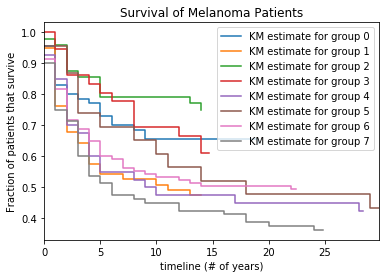

In [4]:
def getKMF (df, groupNumber):
    groupSurvival = df.copy()
    KMlabel = "KM estimate for group " + str(groupNumber)
    durations = []
    event_observed = []
            
    for status, days in groupSurvival.values:
        if status == 'Dead':
            durations.append(int(days/365))
            event_observed.append(1)
        elif status == 'Alive':
            durations.append((max(df.loc[:, 'duration'].values) + 1 )/365)
            event_observed.append(0)
    
    kmf = KaplanMeierFitter()
    kmf.fit(durations, event_observed, label= KMlabel)
    
    return kmf

goodCases = survivalDfSKCM.index.intersection(groups[0])
group0survival = survivalDfSKCM.loc[goodCases]
kmf1 = getKMF(group0survival, 0)
axes = kmf1.plot(ci_show=False)   

i = 0
while i < 8:
    if i > 0:
        goodCases = survivalDfSKCM.index.intersection(groups[i])
        groupsurvival = survivalDfSKCM.loc[goodCases]
    
        kmf = getKMF(groupsurvival, i)
        kmf.plot(ci_show=False, ax=axes)
    i = i + 1
    
plt.title('Survival of Melanoma Patients')
plt.ylabel('Fraction of patients that survive')
plt.xlabel('timeline (# of years)')

Text(0.5, 0, 'timeline (# of years)')

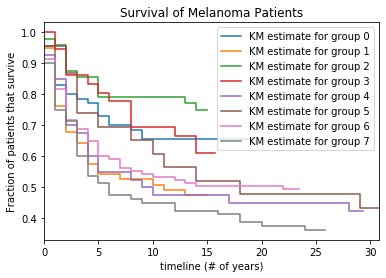

In [17]:
goodCases = survivalDfSKCM.index.intersection(groups[0])
group0survival = survivalDfSKCM.loc[goodCases]
kmf1 = getKMF(group0survival, 0)
ax = kmf1.plot(ci_show=False)

goodCases = survivalDfSKCM.index.intersection(groups[1])
group1survival = survivalDfSKCM.loc[goodCases]
kmf1 = getKMF(group1survival, 1)
kmf1.plot(ci_show=False, ax=ax)

goodCases = survivalDfSKCM.index.intersection(groups[2])
group2survival = survivalDfSKCM.loc[goodCases]
kmf1 = getKMF(group2survival, 2)
kmf1.plot(ci_show=False, ax=ax)

goodCases = survivalDfSKCM.index.intersection(groups[3])
group3survival = survivalDfSKCM.loc[goodCases]
kmf1 = getKMF(group3survival, 3)
kmf1.plot(ci_show=False, ax=ax)

goodCases = survivalDfSKCM.index.intersection(groups[4])
group4survival = survivalDfSKCM.loc[goodCases]
kmf1 = getKMF(group4survival, 4)
kmf1.plot(ci_show=False, ax=ax)

goodCases = survivalDfSKCM.index.intersection(groups[5])
group5survival = survivalDfSKCM.loc[goodCases]
kmf1 = getKMF(group5survival, 5)
kmf1.plot(ci_show=False, ax=ax)

goodCases = survivalDfSKCM.index.intersection(groups[6])
group6survival = survivalDfSKCM.loc[goodCases]
kmf1 = getKMF(group6survival, 6)
kmf1.plot(ci_show=False, ax=ax)

goodCases = survivalDfSKCM.index.intersection(groups[7])
group7survival = survivalDfSKCM.loc[goodCases]
kmf1 = getKMF(group7survival, 7)
kmf1.plot(ci_show=False, ax=ax)

plt.title('Survival of Melanoma Patients')
plt.ylabel('Fraction of patients that survive')
plt.xlabel('timeline (# of years)')

Text(0.5, 0, 'timeline (# of years)')

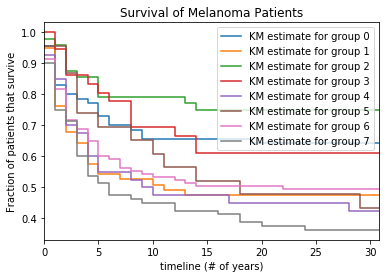

In [22]:
def getKMF (df, groupNumber, maxValue):
    groupSurvival = df.copy()
    KMlabel = "KM estimate for group " + str(groupNumber)
    durations = []
    event_observed = []
            
    for status, days in groupSurvival.values:
        if status == 'Dead':
            durations.append(int(days/365))
            event_observed.append(1)
        elif status == 'Alive':
            durations.append(maxValue)
            event_observed.append(0)
    
    kmf = KaplanMeierFitter()
    kmf.fit(durations, event_observed, label= KMlabel)
    
    return kmf

maxValue = max(survivalDfSKCM.loc[:, 'duration'].values)/365+1

goodCases = survivalDfSKCM.index.intersection(groups[0])
group0survival = survivalDfSKCM.loc[goodCases]
kmf1 = getKMF(group0survival, 0, maxValue)
axes = kmf1.plot(ci_show=False)   

i = 0
while i < 8:
    if i > 0:
        goodCases = survivalDfSKCM.index.intersection(groups[i])
        groupsurvival = survivalDfSKCM.loc[goodCases]
    
        kmf = getKMF(groupsurvival, i, maxValue)
        kmf.plot(ci_show=False, ax=axes)
    i = i + 1
    
plt.title('Survival of Melanoma Patients')
plt.ylabel('Fraction of patients that survive')
plt.xlabel('timeline (# of years)')

In [ ]:
#subtract different kernels: kmf1.subtract(kmf2)

# compares survivalness at a specific point in time
    from lifelines.statistics import survival_difference_at_fixed_point_in_time_test
results = survival_difference_at_fixed_point_in_time_test(point_in_time, T1, T2, event_observed_A=E1, event_observed_B=E2)
results.print_summary()

In [ ]:
# research hazard ratio from days to death
# difference between the two lines is the hazard ratio, pretty much
# look up what the header titles mean in GDC